In [1]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!mv kaggle.json ~/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Download dataset from Kaggle
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:10<00:00, 57.9MB/s]
100% 812M/812M [00:10<00:00, 85.0MB/s]


In [5]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
!unzip -qq train.zip

In [7]:
!rm -r sampleSubmission.csv dogs-vs-cats.zip train.zip

In [8]:
!ls train | wc -l

25000


In [9]:
# دستور لینوکسی شمارش
!ls train | wc -l

25000


In [11]:
import os, shutil

In [12]:
len(os.listdir(path= 'train'))

25000

In [13]:
original_dataset_dir = '/content/train'

base_dir = '/content/subset'
os.makedirs(base_dir, exist_ok= True)

In [14]:
# Directories for our train, validation and test split
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok= True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok= True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok= True)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok= True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok= True)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok= True)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok= True)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok= True)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok= True)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)




In [15]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images:  500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500


In [16]:
!rm -r train

In [38]:
import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Input(shape= (150, 150, 3)))
model.add(layers.Conv2D(32, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(loss= 'binary_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate= 1e-4),
              metrics= ['acc'])



In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest')
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    # Target directory
    train_dir,
    target_size = (150, 150),
    batch_size= 32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150, 150),
    batch_size= 32,
    class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
data, lbl = next(train_generator)
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
history = model.fit(train_generator,
                    epochs= 100,
                    validation_data= validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - acc: 0.4780 - loss: 0.6984 - val_acc: 0.5830 - val_loss: 0.6910
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - acc: 0.5131 - loss: 0.6927 - val_acc: 0.5050 - val_loss: 0.6890
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - acc: 0.5580 - loss: 0.6884 - val_acc: 0.5010 - val_loss: 0.6914
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - acc: 0.5578 - loss: 0.6842 - val_acc: 0.5700 - val_loss: 0.6761
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - acc: 0.5487 - loss: 0.6845 - val_acc: 0.5830 - val_loss: 0.6706
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - acc: 0.5668 - loss: 0.6756 - val_acc: 0.5640 - val_loss: 0.6686
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - acc: 0.6093 - loss: 0.6557 - val_acc: 0.5520 - val_loss: 0.6745
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - acc: 0.5928 - loss: 0.6672 - val_acc: 0.6150 - val_loss: 0.6459
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1

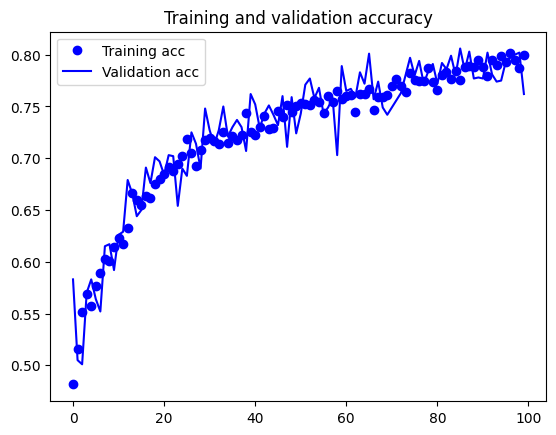

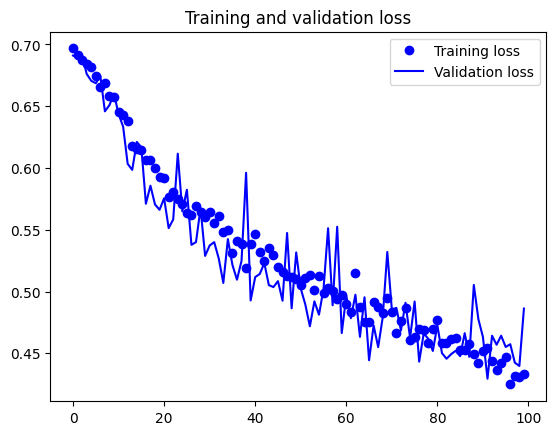

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
model.save('cats_and_dogs.keras')

In [23]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'

)

Text(0.5, 1.0, '0.0')

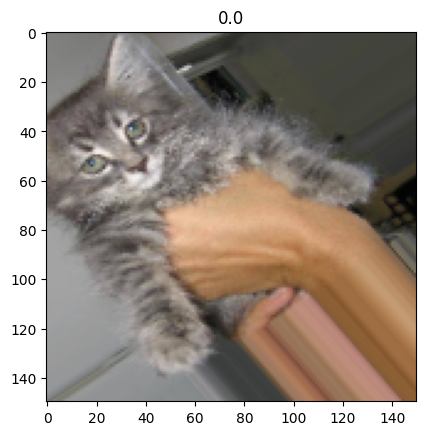

In [20]:
import matplotlib.pyplot as plt
plt.imshow(data[2])
plt.title(lbl[2])

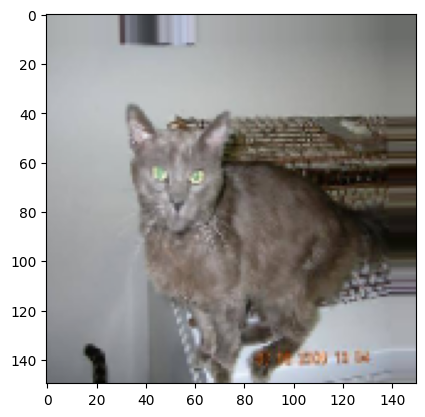

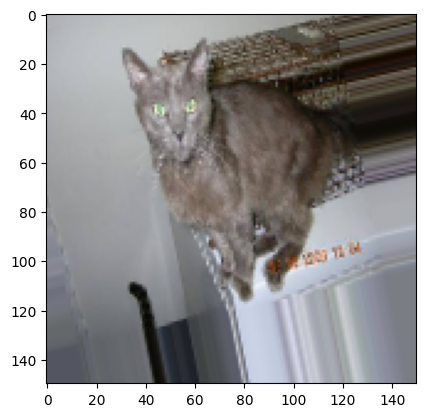

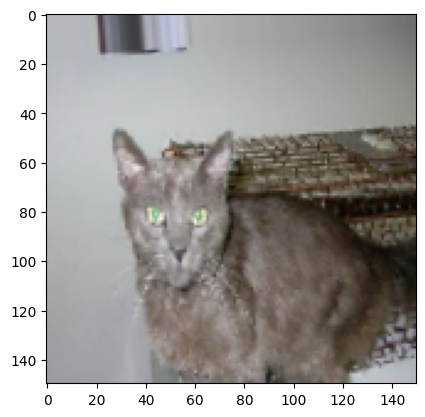

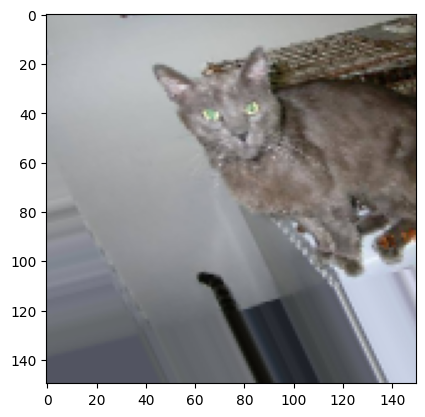

In [26]:
# Understanding of Data Augmentation
import keras.utils as image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We take one image to augment
img_path = fnames[9]

img= image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size= 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()
